# **Week3 (Classification) 과제**

# Red Wine Quality Classification

## 데이터 소개
  
UCI Machine Learning  
**TASK : Red wine Classification**  
https://archive.ics.uci.edu/dataset/186/wine+quality


csv 파일의 컬럼은 아래와 같습니다.

*   index : 구분자
*   quality : 품질
*   fixed acidity : 산도
*   volatile acidity : 휘발성산
*   citric acid : 시트르산
*   residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
*   chlorides : 염화물
*   free sulfur dioxide : 독립 이산화황
*   total sulfur dioxide : 총 이산화황
*   density : 밀도
*   pH : 수소이온농도
*   sulphates : 황산염
*   alcohol : 도수
*   type : 종류



In [3]:
# 코랩 환경: 구글 드라이브에 코랩을 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# loading data ,your own file path
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', sep = ';')

## EDA(Exploratory Data Analysis)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1 Data brief review : info() 함수를 통해 알아낼 수 있는 정보를 작성하시오.
(**빈칸 ## 4개를 채우시오**)


답: It turns out that the dataset does not have (**null**) values. The dataset consists of (**1599**) rows and (**12**) columns. The data type of all variables are (**float64**).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Q2 결측치 확인
결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 정리해주세요.

결측치는 판단에 따라 drop(제거) 할 수 있고, 특정 값으로 채울(대체) 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [ ]:
# 결측치 확인
## df의 결측치의 총 합을 확인하는 코드를 작성하며, ##을 채우세요. sum()을 2번 사용하시오.
print("There are {} null values in the dataset".format(df.isna().sum().sum()))

There are 0 null values in the dataset


### Q3 데이터 분포 확인
각 변수의 데이터 분포가 어떠한지 기술하시오.(맨 위의 세개의 변수에 대해서만 기술)

1. 'fixed_acidity' : 살짝 right-skewed된 형태를 보인다.fixed_acidity가 14보다 큰 지점에 소수의 이상치가 확인되는 것 같다.
2. 'volatile_acidity' : volatile_acidity = 0.5인 지점을 축으로 어느 정도 대칭적인 형태를 보이며 peak가 두 개 정도 확인된다.volatile_acidity가 1.0보다 큰 지점에 소수의 이상치가 존재하는 것 같다.
3. 'citric_acid' : citric_acid 값이 커질수록 빈도수가 증감을 반복하다가 감소하는 분포를 보인다.

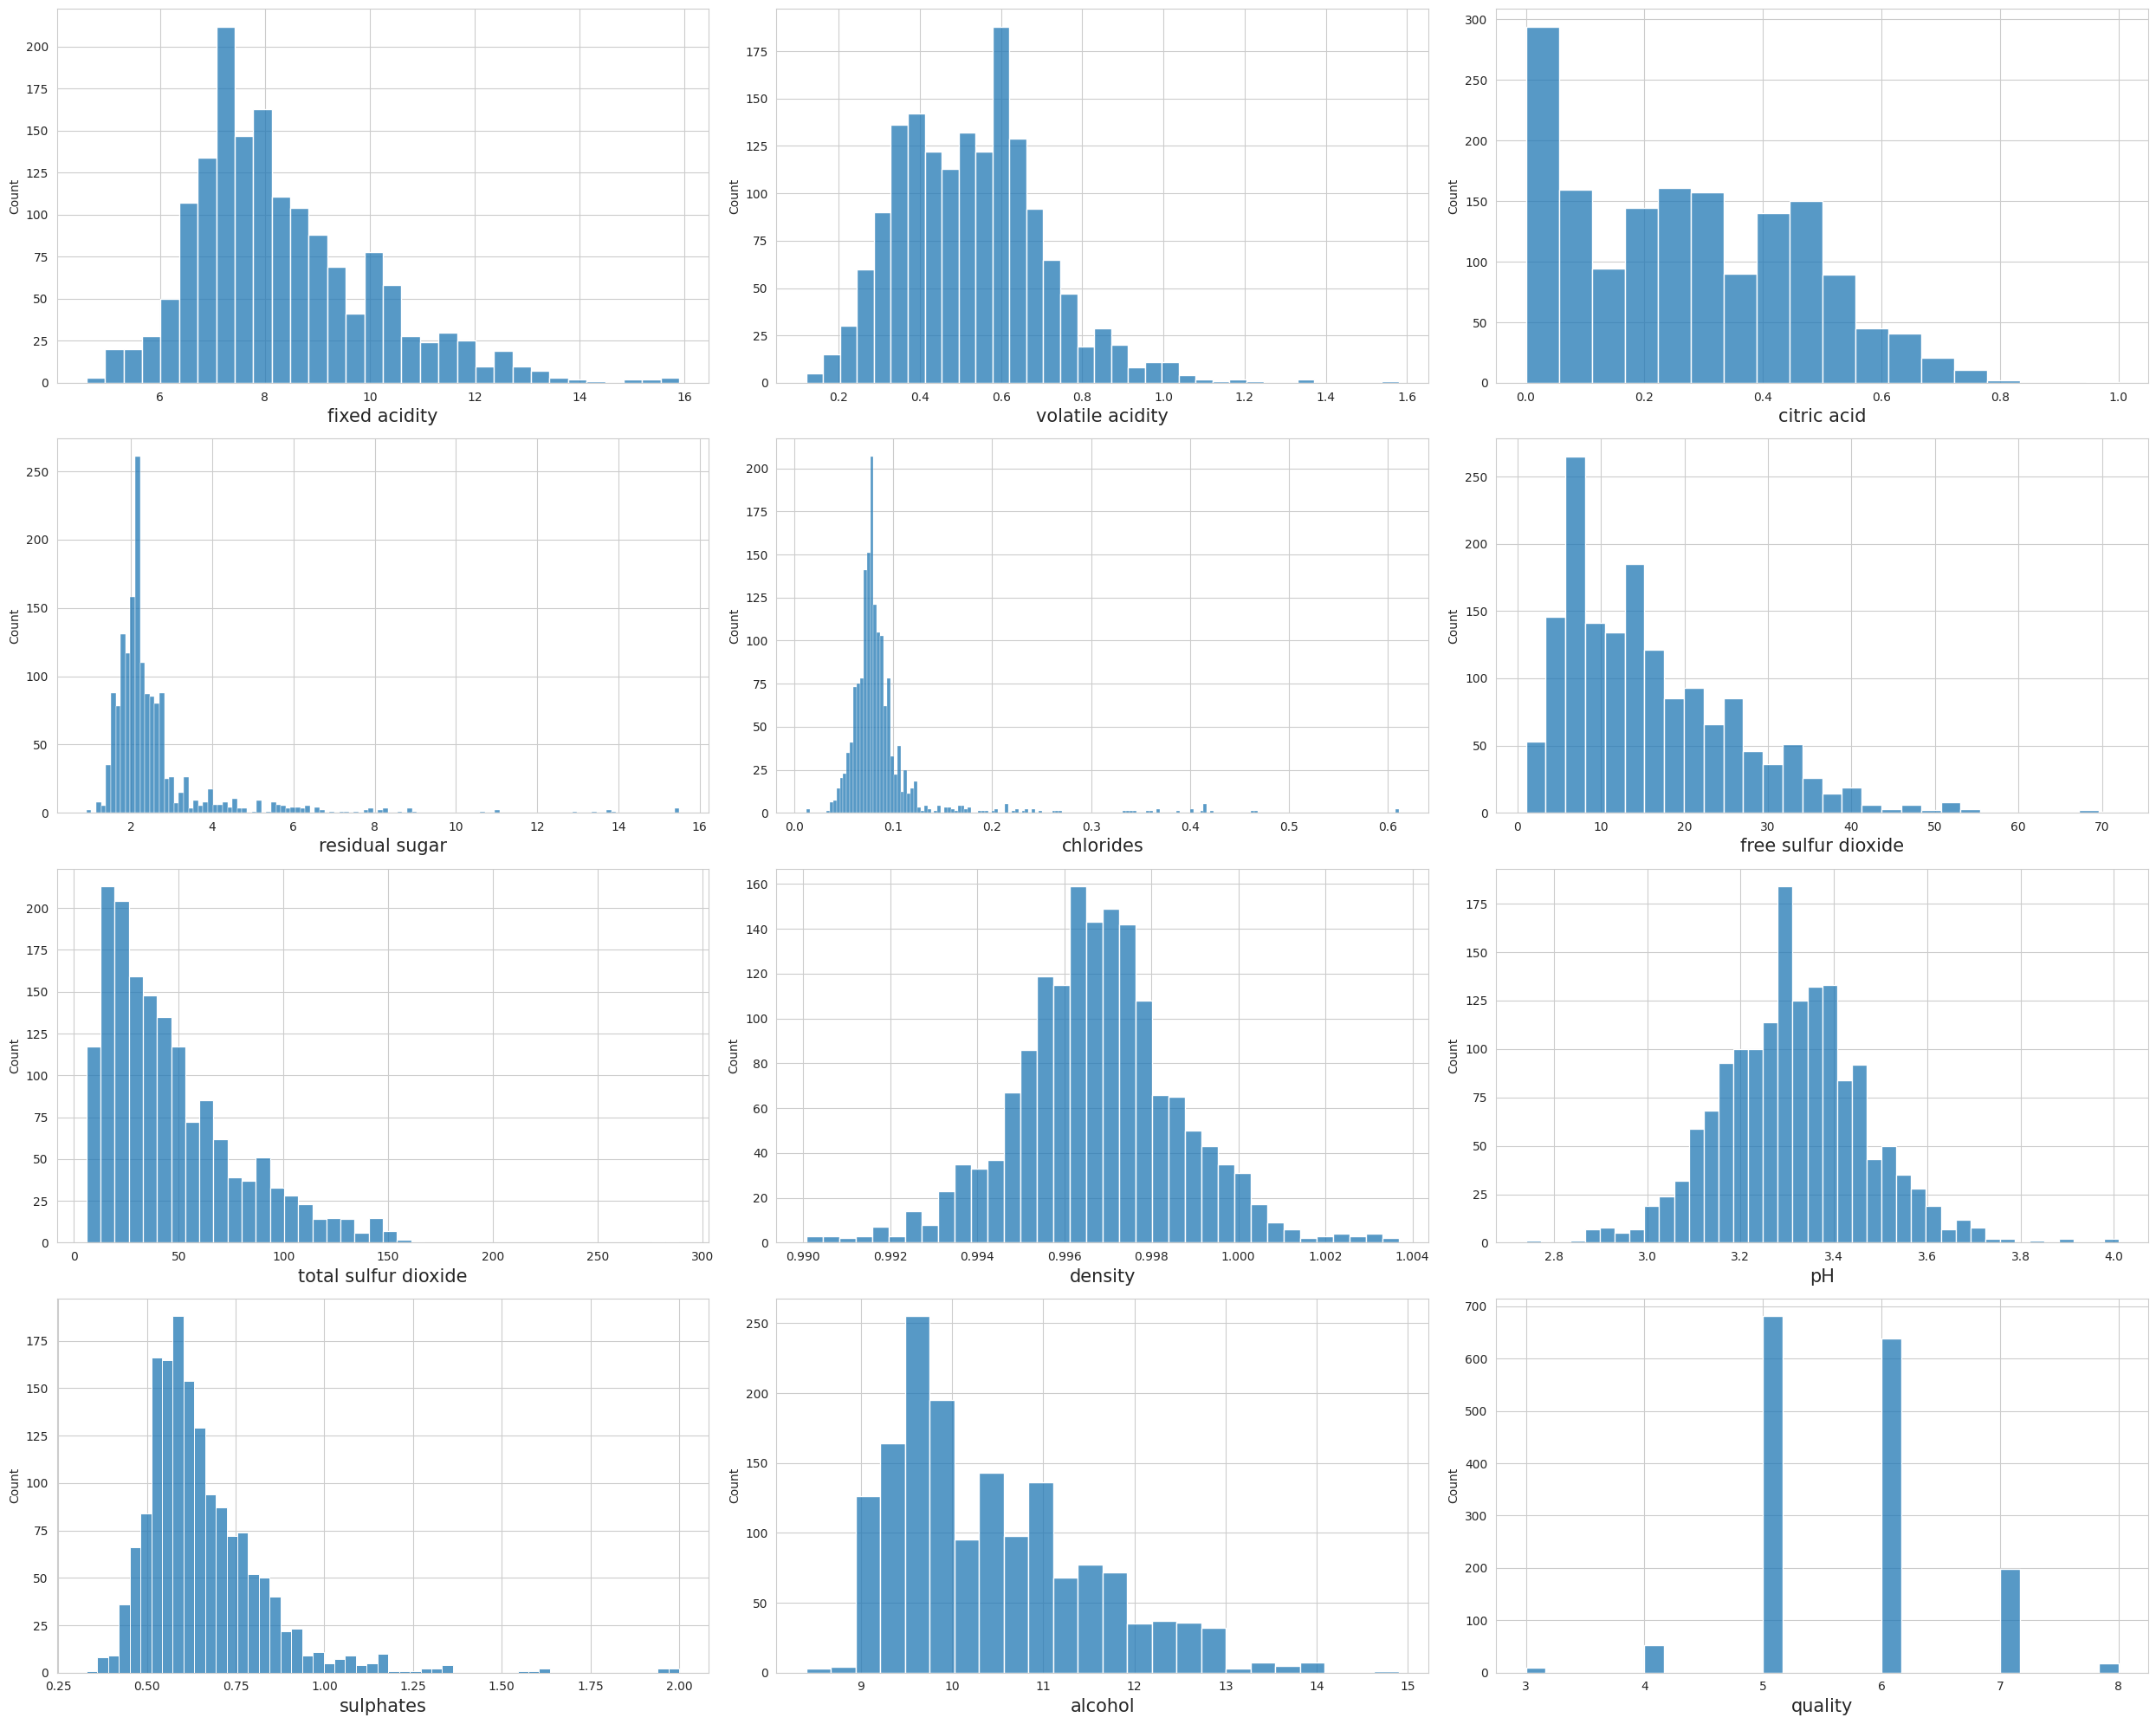

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

### Q4. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

더불어 multicollinearity(통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제)에 주목하여, 해당 correlation plot에서 어떤 영향을 주고 있는지 있는지 예를 들어 기술하시오.

답: fixed acidity와 citric acid, fixed acidity와 density, fixed acidity와 pH, volatile acidity와 citric acid, citric acid와 pH, free sulfur dioxide과 total sulfur dioxide, density와 alcohol 간에는 상관계수의 절댓값이 모두 0.5가 넘음을 확인할 수 있다. 이처럼 독립변수들 간에 강한 상관관계가 존재함은 다중공선성이 존재함을 의미하고, 이로 인해 각 독립변수의 순수한 영향력을 정확히 파악할 수 없기 때문에 왜곡된 회귀계수가 계산될 수 있다. 이는 모델의 예측력 저하로 이어질 것이다. 특히 fixed acidity와 citric acid는 여러 독립변수들과의 상관계수가 높음을 알 수 있다. 따라서 이와 같은 변수를 제거하거나 정규화를 이용해 다중공선성을 완화해야할 필요성이 보인다.



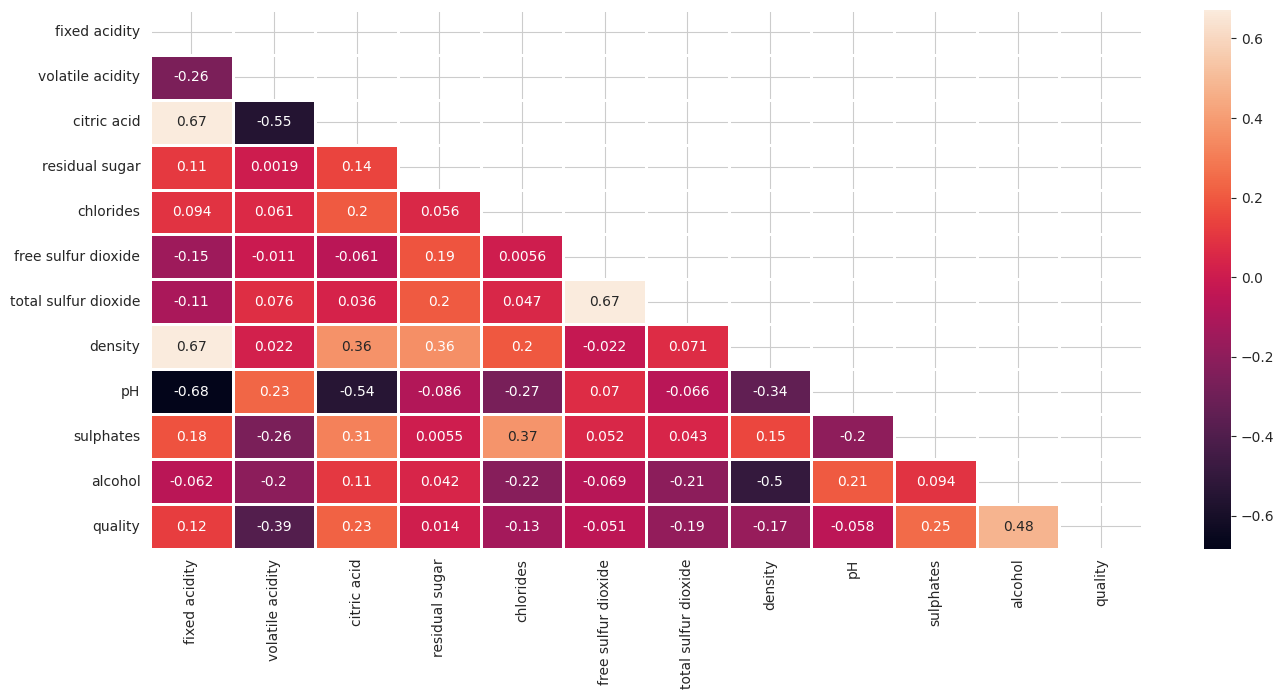

In [ ]:
# 상관관계 plot
plt.figure(figsize = (16, 7))

corr = df.corr()
##에 들어갈 코드를 작성하시오.
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

In [ ]:
#Pearson correlation coefficient
import scipy.stats as st
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],df["density"]))
print("Pearson correlation coefficient:", st.pearsonr(df["free sulfur dioxide"],df["total sulfur dioxide"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["citric acid"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.4961797702417016, pvalue=3.9388353399881845e-100)
Pearson correlation coefficient: PearsonRResult(statistic=0.6676664504810215, pvalue=6.40472295468106e-207)
Pearson correlation coefficient: PearsonRResult(statistic=-0.6829781945685314, pvalue=4.063034039843752e-220)
Pearson correlation coefficient: PearsonRResult(statistic=-0.5419041447395097, pvalue=1.007201325911493e-122)
Pearson correlation coefficient: PearsonRResult(statistic=0.6680472921189734, pvalue=3.0747470608605733e-207)


### Q5. quality range를 두 파트로 나눠보세요.
In this dataset quality range is between 3 and 8
We will divide quality range into two parts:



*   High quality wine: 6 - 8
*   Low quality wine: 3 - 5



In [7]:
df["quality"] = ((6 <= df["quality"]) & (df["quality"] <= 8)).astype(int)
##에 들어갈 코드를 작성하시오.
df["quality"]

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [ ]:
df.head().style.background_gradient(cmap = "Reds")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0


### Q6. 종속변수(y,label)은 무엇이 되어야 하나요?


In [8]:
# we select dependent variable (label)
y = df["quality"] ##을 채우시오. -> quality가 종속변수

# we select independent variable
x = df.drop("quality", axis = 1) ##을 채우시오. -> quality를 제외한 모든 변수가 독립변수

In [9]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)
# 75:25로 데이터셋 분할

### Q7. 왜 Standardization(StandardScaler, MinMaxScaler 등) 사용할까요?
두 Scaler의 특징에 대해 조사하고, 보다 적절한 Scaler가 무엇일지 그 이유와 함께 적어주세요.

답 : StandardScaler은 각 피처의 평균이 0, 표준편차가 1이 되도록 표준화를 하는 Scaler이다. 따라서 StandardScaler은 데이터가 정규 분포에 가까울 때 잘 동작한다. MinMaxScaler은 각 피처가 주어진 최소값과 최대값 사이의 값이 되도록 변환하는 Scaler이다. 따라서 이상치에 민감하기 때문에 이상치가 있는 경우에는 스케일이 왜곡될 수 있다. 그리고 값들을 주어진 범위로 제한하는 기능을 하므로, 피처 간 분산의 차이가 클 때 사용하기 적절하다. Q1의 df.describe() 결과를 보면 free sulfur dioxide, total sulfur dioxide의 std와 다른 피처들의 std 간의 차이가 큼을 알 수 있다. 또한 Q3의 히스토그램을 살펴보면, 모든 피처들이 정규 분포를 따른다고 보기는 어렵기 때문에 MinMaxScaler를 사용하는 것이 더 적절해보인다.

In [10]:
# scaling data
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

### Q7-2. 위의 코드에서, train dataset에 대해서는 fit_transform을, test dataset에 대해서는 transform을 실시하는 이유가 무엇일지 조사해주세요.
답 : fit_transform은 fit과 transform을 모두 포함하고, transform은 데이터 변환만을 실시한다. 모델 학습 과정에서는 훈련 데이터만을 이용해서 파라미터를 결정해야하며, 테스트를 할 때는 학습 과정에서 '모델이 알지 못했던' 데이터를 이용해야 한다. 따라서 train dataset에만 fit을 실시하여 모델의 파라미터를 학습하고, test dataset에는 앞서 결정된 파라미터를 동일하게 적용해야 하므로 transform만을 실시한다.

In [14]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

In [ ]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    0
73      0
446     0
399     0
647     0
Name: quality, dtype: int64
(1199,)
___________________________
75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int64
(400,)


### Q8. Building Classification models

이번 코드에서는 non parametric model; knn을 사용하여 train, test 진행해보았습니다.

아래의 코드 외에도 원하는 한가지 classification 모델(KNN 제외)을 선정하여 아래의 과정을 반복하고, 그 결과를 해석하세요. grid search 과정은 거치지 않고 임의의 파라미터값으로 진행해도 좋습니다.

아래와 같은 Kaggle 코드들도 참고해보세요.  
- https://www.kaggle.com/code/melissamonfared/red-wine-quality-prediction-eda-classification/notebook
- https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification


In [ ]:
## 아래의 과정을 반복하시오.

In [12]:
from sklearn.model_selection import GridSearchCV # GridSearchCV는 모델의 하이퍼파라미터를 자동으로 조정하고 최적의 값을 찾기 위한 도구
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier는 KNN 알고리즘을 구현한 클래스
#KNN

knn = KNeighborsClassifier() # knn은 기본 하이퍼파라미터로 초기화된 KNN 모델

# 하이퍼파라미터 그리드(GridSearchCV는가 탐색할 파라미터의 조합)를 정의(딕셔너리로 지정)
knn_params = {"n_neighbors": np.arange(2, 50),    # n_neighbors는 KNN에서 고려할 이웃의 수
             "weights": ["uniform", "distance"],  # weights는 각 이웃의 기여도 계산 방식(uniform - 모든 이웃에 동일한 가중치 / distance - 가까운 이웃일수록 더 높은 가중치)
             "leaf_size": [25, 30, 25]}           # leaf_size는 K-D 트리 알고리즘에서 노드 분할 시 고려하는 데이터 포인트의 최소 개수

# GridSearchCV가 설정된 파라미터 그리드 knn_params를 이용해 모델 knn의 하이퍼파라미터 탐색
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)   # cv = 10 -> 10-Fold CV -> 교차 검증을 사용해 각 파라미터 조합의 성능 평가

# 훈련 데이터로 최적의 하이퍼파라미터를 결정
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [32]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

# best score for train set -> 해당 모델이 훈련 데이터에서 약 79.82%의 정확도로 예측을 해냄
# best K value -> K = 21일 때 모델이 가장 잘 작동 -> 가까운 21개의 이웃을 고려해 예측
# best weights -> distance 방식(가까운 이웃일수록 더 큰 가중치 부여)이 최적
# best leaf size -> 트리 구조에서 각 leaf node가 최대 25개의 데이터 포인트를 포함하도록 함

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [13]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

# train set에서의 교차 검증을 통해 찾은 최적의 하이퍼파라미터를 그대로 사용해 새로운 knn_model을 정의
# 앞서 결정한 하이퍼파라미터를 사용해 최적화된 모델로, train data set을 이용해 최종 모델을 학습

KNeighborsClassifier(leaf_size=25, n_neighbors=21, weights='distance')

In [14]:
from sklearn.metrics import accuracy_score
y_pred = knn_model.predict(x_test) # 최종 모델인 knn_model에 test set을 이용해 예측값 생성
print("Accuracy:",accuracy_score(y_test, y_pred)) # Validation Set Accuracy

# test set에서 모델이 약 80.25%의 정확도로 예측을 함

Accuracy: 0.8025


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# quality = 0인 188개의 샘플 -> precision = 0.78, recall = 0.81, f1-score = 0.79
# quality = 1인 212개의 샘플 -> precision = 0.82, recall = 0.80, f1-score = 0.81
# 두 클래스 모두에서 좋은 성능을 보이며, quality = 1인 샘플에 대해 조금 더 좋은 성능을 보임.

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



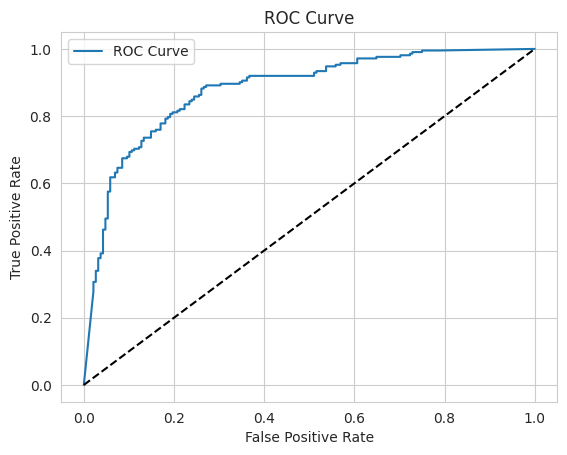

AUC Score: 0.8789140907266157


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score # roc_curve: ROC Curve를 계산하는 함수
                                                     # roc_auc_score: AUC(ROC Curve 아래의 면적)를 계산하는 함수
# Validation Set 에 대한 예측확률 계산
y_prob = knn_model.predict_proba(x_test)[:,1] # predict_proba는 각 클래스에 대해 예측확률(각 샘플이 특정 클래스에 속할 확률을 모델로 예측한 값)을 반환
                                              # ROC Curve는 클래스 1의 예측확률을 사용해 그리기 때문에 [:, 1] 사용

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # 실제 y_test 값과 예측된 y_prob를 기반으로 FPR, TPR, thresholds(예측확률을 어떤 값으로 분류할지 결정하는 기준값)를 계산
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--') # 대각선 -> 무작위 예측을 의미
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score) # AUC Score: 0.8789140907266157 -> 성능이 우수함

In [ ]:
# Boosting 개념
# 앙상블 학습 기법: 여러 개의 약한 학습기를 순차적으로 학습 -> 오류가 큰 데이터에 더 높은 가중치를 부여해서 오류 보완 -> 모든 약한 학습기의 결과를 결합해 강력한 학습기를 만들어 최종 예측
# 약한 학습기는 typically decision trees

# (1) Gradient Boosting
# Loss Function을 최소화하기 위해 gradient를 활용하는 방법
# 과정) 초기 모델 생성 후 예측값 생성 -> 각 데이터 포인트에 대해 잔차 계산 -> 잔차를 예측하기 위한 새로운 약한 학습기 학습 -> 이게 잔차를 잘 예측하면 기존 모델에 이 학습기의 결과를 추가
# 위 과정을 반복하면서 Loss Function을 최소화
# 속도가 느리고 메모리 효율성이 상대적으로 낮음. 보통의 성능. 상대적으로 간단한 난이도

# (2) XGBoost
# Gradient Boosting의 효율적인 구현체
# Regularization(L1, L2 정규화 지원) / 병렬 처리(빠른 훈련 속도) / 결측값 자동 처리
# 속도가 빠르고 메모리 효율성이 높음. 성능이 높지만 다소 복잡한 난이도

# (3) LightGMB
# Gradient Boosting을 더욱 빠르고 가벼운 방식으로 구현
# 속도가 매우 빠르고 메모리 사용량이 작음. 대규모 데이터에서 높은 성능을 보이지만 다소 복잡한 난이도

In [26]:
# Gradient Boosting 구현 과정
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# (1) GridSearchCV을 이용해 하이퍼파라미터 탐색 및 최적의 하이퍼파라미터 결정
gb = GradientBoostingClassifier()

gb_params = {                                      # 하이퍼파라미터 그리드 설정 - 챗GPT의 추천 범위 값 활용
    'n_estimators' : [50, 100, 150],               # n_estimators: 약한 학습기의 개수
    'learning_rate' : [0.01, 0.1, 0.15],           # learning_rate: 학습률
    'max_depth' : [3, 5, 7],                       # max_depth: 각 트리의 최대 깊이
    'min_samples_split' : [2, 5, 10]               # min_samples_split: 노드 분할의 최소 샘플 수
}

gb_cv_model = GridSearchCV(gb, gb_params, cv = 10) # 10-Fold CV로 하이퍼파라미터 최적화

gb_cv_model.fit(x_train, y_train)                  # 훈련 데이터로 최적의 하이퍼파라미터를 결정

print("Best score for train set: " + str(gb_cv_model.best_score_))     # 최적의 하이퍼파라미터 출력
print("____________________________________________")
print("best n_estimators value: " + str(gb_cv_model.best_params_["n_estimators"]),
     "\nbest learning_rate: " + str(gb_cv_model.best_params_["learning_rate"]),
     "\nbest max_depth: " + str(gb_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split: " + str(gb_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.8031932773109244
____________________________________________
best n_estimators value: 150 
best learning_rate: 0.15 
best max_depth: 7 
best min_samples_split: 2


In [28]:
# (2) 앞서 교차 검증을 통해 찾은 최적의 하이퍼파라미터를 그대로 사용해 최종 모델인 gb_model 학습하고 예측값 생성
gb_model = GradientBoostingClassifier(n_estimators = gb_cv_model.best_params_["n_estimators"],
                                      learning_rate = gb_cv_model.best_params_["learning_rate"],
                                      max_depth = gb_cv_model.best_params_["max_depth"],
                                      min_samples_split = gb_cv_model.best_params_["min_samples_split"])
gb_model.fit(x_train, y_train)

y_pred = gb_model.predict(x_test) # 최종 모델인 gb_model test set을 이용해 예측값 생성

Accuracy: 0.8175
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       188
           1       0.85      0.79      0.82       212

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



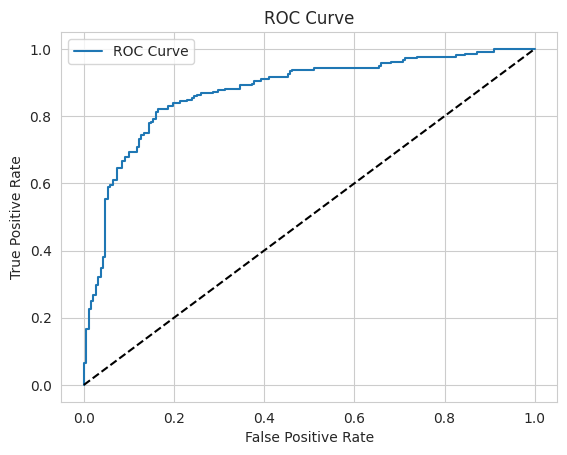

AUC Score: 0.874422922521076


In [32]:
# (3) Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Accuracy Score on test set
print("Accuracy:",accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = gb_model.predict_proba(x_test)[:,1]          # 예측확률 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)      # FPR, TPR, thresholds 계산
plt.plot(fpr, tpr, label = "ROC Curve")               # ROC Curve 플롯
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

#### 결과 해석
주어진 Gradient Boosting 모델은 n_estimators(약한 학습기의 개수) = 150, learning_rate(학습률) = 0.15, max_depth(각 트리의 최대 깊이) = 7, min_samples_split(노드 분할의 최소 샘플 수) = 2를 최적의 파라미터로 선택하였다. n_estimators와 max_depth 값이 크고 min_samples_split 값이 작아 과적합이 우려되는 하이퍼파라미터이다. <br>
train set에 대한 best score는 0.8032으로 해당 모델이 train set에서 평균 약 80.32%의 정확도로 예측을 해냈음을 알 수 있다. 그리고 test set에 대한 accuracy score는 0.8175로, 과적합이 우려되는 하이퍼파라미터였음에도 KNN 모델에서보다 높은 성능을 보이고 있다. <br>
classification report로 quality 클래스별 precision, recall, f1-score도 확인할 수 있는데, quality = 1인 샘플에 대한 예측이 더 정확하게 이루어졌음을 알 수 있다. ROC Curve 아래의 면적인 AUC Score은 0.8744로 KNN 모델과 비교했을 때는 살짝 더 낮지만 그래도 높은 성능을 보이고 있다고 해석할 수 있다.
